In [1]:
using DifferentialEquations, Distributions, Plots

ArgumentError: Module Hiccup not found in current path.
Run `Pkg.add("Hiccup")` to install the Hiccup package.


In [2]:
orth(M) = qr(M)[1]

orth (generic function with 1 method)

In [3]:
function makeStableMatrix(n)
    eig = diagm(rand(Uniform(-1,0),n))
    v = orth(rand(Uniform(-1,0),n,n))
    A = v' * eig * v
    return A
end

makeStableMatrix (generic function with 1 method)

In [4]:
A = makeStableMatrix(5)

5×5 Array{Float64,2}:
 -0.396938   -0.0489049  -0.159474   -0.0687413  -0.0071927
 -0.0489049  -0.556452   -0.173691   -0.0487668   0.153552 
 -0.159474   -0.173691   -0.505745    0.0504969  -0.245124 
 -0.0687413  -0.0487668   0.0504969  -0.312323   -0.116824 
 -0.0071927   0.153552   -0.245124   -0.116824   -0.410472 

In [5]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

DiffEqBase.ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

In [6]:
g(x,p,t) = A*x
x0 = rand(5)
tspan = (0.0,100.0)
prob = ODEProblem(g,x0,tspan)

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: [0.765851, 0.557528, 0.0812568, 0.468722, 0.993813]

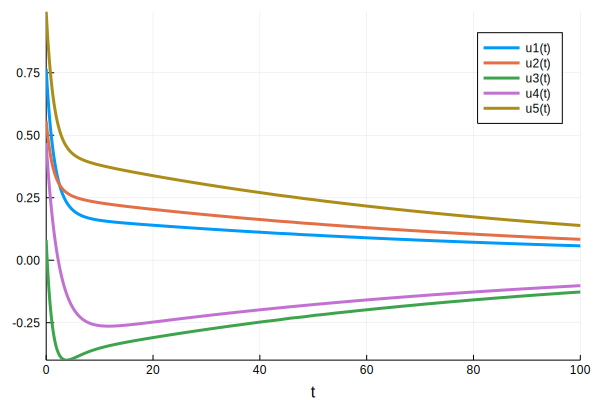

In [7]:
sol = solve(prob)
plot(sol)

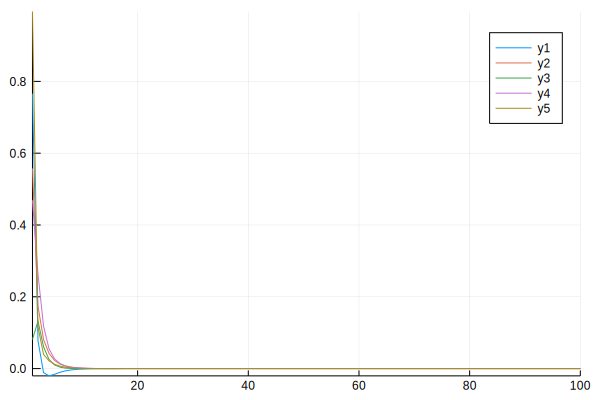

In [22]:
step(A,B,C,u,p,x) = A*x + x

function sim(A::Array{T,2},B::Array{T,2},C::Array{T,2},u::Array{T,1},
        p::Array{T,1},x0::Array{T,1},e=0.05) where T<:Real
    ntime = size(u,1)
    nfeatures = size(x0,1)
    time = 1:ntime
    x = zeros(ntime, nfeatures)
    z = zeros(nfeatures)
    x[1,:] = x0
    for t in 2:ntime
        x[t,:] = step(A,B,C,u[t],p[t],x[t-1,:]) #+ T.normal(z,e).cuda()
    end
    return x
end

nfeatures = 5
ntime = 100
A_true = makeStableMatrix(nfeatures)
B_true = rand(nfeatures,nfeatures)
C_true = rand(nfeatures,nfeatures)
u = rand(ntime)
p_true = rand(ntime)

x = sim(A_true,B_true,C_true,u,p_true,x0)
plot(x)

In [23]:
x

100×5 Array{Float64,2}:
  0.765851     0.557528      0.0812568    0.468722     0.993813   
  0.0774607    0.173723      0.132061     0.262879     0.11583    
 -0.01124      0.0809888     0.0606928    0.118271     0.039473   
 -0.0202649    0.0420633     0.0251826    0.0546737    0.0214049  
 -0.0157274    0.0226348     0.0100895    0.0267458    0.0120589  
 -0.010259     0.0123938     0.00383735   0.0137742    0.00669435 
 -0.00623856   0.00685767    0.00130384   0.00737741   0.00367484 
 -0.00366709   0.00382078    0.000323344  0.00406054   0.00200643 
 -0.00211825   0.00213929   -2.00186e-5   0.00227527   0.00109371 
 -0.00121265   0.00120233   -0.00011268   0.00128943   0.000596565
 -0.000691193  0.000677808  -0.000115111  0.000735863  0.000326032
 -0.000393269  0.000383102  -9.14422e-5   0.000421747  0.000178665
 -0.000223683  0.000217021  -6.53348e-5   0.000242344  9.82153e-5 
  ⋮                                                               
 -1.40335e-22  1.35071e-22  -1.12874e-